<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Telecomm EDA Challenge Lab

_Author: Alex Combs (NYC) _

---

Let's do some Exploratory Data Analysis (EDA)! As a data scientist, you often may find yourself given a data set you've never seen before, and asked to do a rapid analysis. This is today's goal.

# Prompt

You work for a telecommunications company. The company has been storing metadata about customer phone usage, as part of the regular course of business. Currently, this data is sitting in an unsecured database. The company doesn't want to pay to increase their database security, because they don't think there's really anything to be learned from the metadata.

They are under pressure from "right to privacy" organizations to beef up the database security. These organizations argue that you can learn a lot about a person from their cell phone metadata.

The telecom company wants to understand if this is true, and they want your help. They will give you one person's metadata for 2014 and want to see what you can learn from it.

Working in teams, create a report revealing everything you can about the person. Prepare a presentation, with slides, showcasing your findings.


# The Data

The [person's metadata](./datasets/metadata.csv) has the following fields:

| Field Name          | Description
| ---                 | ---
| **Cell Cgi**        | cell phone tower identifier
| **Cell Tower**      | cell phone tower location
| **Comm Identifier** |	de-identified recipient of communication
| **Comm Timedate String** | time of communication
| **Comm Type	Id**  | type of communication
| **Latitude**        | latitude of communication
| **Longitude**       | longitude of communication


# Hints

This is totally open-ended! If you're totally stumped -- and only if stumped -- should you look below for prompts. As a starting point, given that you have geo-locations, consider investigating ways to display this type of information (i.e. mapping functionality).

<font color='white'>
Well for starters, he's in Australia!

Ideas for things to look into:
- where does he work?
- where does he live?
- who does he contact most often?
- what hours does he work?
- did he move?
- did he go on holiday?  If so, where did he go?
- did he get a new phone?

Challenges:
- how does he get to work?
- where does his family live?
- if he went on holiday, can you find which flights he took?
- can you guess who some of his contacts are, based on the frequency, location, time and mode (phone/text) of communications?


If you're stuck on how to map the data, you can try "basemap" or "gmplot", or anything else you find online.
</font>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
meta = pd.read_csv('datasets/metadata.csv', skiprows=1, names = ['cgi', 'tower_location', 'identifier', 'timedate', 'comm_type', 'lat', 'long'])

In [15]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
cgi               10476 non-null object
tower_location    10476 non-null object
identifier        1374 non-null object
timedate          10476 non-null object
comm_type         10476 non-null object
lat               10476 non-null float64
long              10476 non-null float64
dtypes: float64(2), object(5)
memory usage: 573.0+ KB


In [16]:
meta.comm_type.value_counts()

Internet    9102
Phone        717
SMS          657
Name: comm_type, dtype: int64

In [67]:
meta[day == [1, 2, or 4]]

SyntaxError: invalid syntax (<ipython-input-67-1eb422463756>, line 1)

In [18]:
meta.head()

,cgi,tower_location,identifier,timedate,comm_type,lat,long
0,50501015388B9,REDFERN TE,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 9:40,Phone,-33.892933,151.202296
1,50501015388B9,REDFERN TE,62157ccf2910019ffd915b11fa037243b75c1624,4/1/14 9:42,Phone,-33.892933,151.202296
2,505010153111F,HAYMARKET #,c8f92bd0f4e6fb45ed7fce96fc831b283db2b642,4/1/14 13:13,Phone,-33.880329,151.205690
3,505010153111F,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 13:13,Phone,-33.880329,151.205690
4,5.05E+106,HAYMARKET #,f1a6836c0b7a3415a19a90fdd6f0ae18484d6d1e,4/1/14 17:27,Phone,-33.880329,151.205690


In [51]:
meta['timedate'] = pd.to_datetime(meta['timedate'])

In [53]:
b = meta.groupby(['tower_location', 'comm_type'])['timedate'].count()

In [55]:
type(b.unstack())

pandas.core.frame.DataFrame

In [21]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 7 columns):
cgi               10476 non-null object
tower_location    10476 non-null object
identifier        1374 non-null object
timedate          10476 non-null datetime64[ns]
comm_type         10476 non-null object
lat               10476 non-null float64
long              10476 non-null float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 573.0+ KB


In [50]:
#meta['timedate'].dt.hour

In [25]:
meta['day'] = meta['timedate'].dt.day
meta['month'] = meta['timedate'].dt.month
meta['hour'] = meta['timedate'].dt.hour

meta['year'] = meta['timedate'].dt.year
meta['minute'] = meta['timedate'].dt.minute

In [26]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 12 columns):
cgi               10476 non-null object
tower_location    10476 non-null object
identifier        1374 non-null object
timedate          10476 non-null datetime64[ns]
comm_type         10476 non-null object
lat               10476 non-null float64
long              10476 non-null float64
day               10476 non-null int64
month             10476 non-null int64
hour              10476 non-null int64
year              10476 non-null int64
minute            10476 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 982.2+ KB


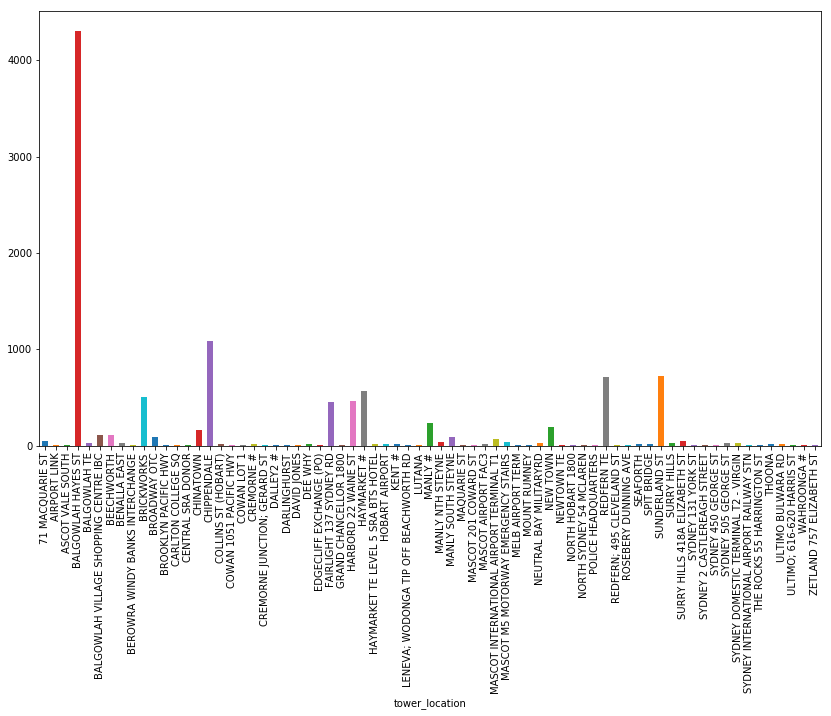

In [31]:
meta.groupby('tower_location')['tower_location'].count().plot(kind = 'bar', figsize = (14, 8))

In [34]:
import folium

ModuleNotFoundError: No module named 'folium'

In [35]:
!pip install folium

    100% |████████████████████████████████| 92kB 4.0MB/s 


In [36]:
import folium

In [65]:
m = folium.Map([meta.lat[718], meta.long[718]], zoom_start = 16)

In [66]:
m

In [42]:
towers = meta.groupby('tower_location')['tower_location'].count()

In [43]:
type(towers)

pandas.core.series.Series

In [62]:
meta['timedate'].dt.weekday.value_counts()

1    1655
2    1635
3    1597
0    1503
4    1445
5    1375
6    1266
Name: timedate, dtype: int64

In [46]:
towers.to_frame().nlargest(10, 'tower_location')

,tower_location
tower_location,
BALGOWLAH HAYES ST,4301
CHIPPENDALE,1084
SUNDERLAND ST,723
REDFERN TE,712
HAYMARKET #,563
BRICKWORKS,501
HARBORD 22 WAINE ST,465
FAIRLIGHT 137 SYDNEY RD,454
MANLY #,231


In [49]:
meta[meta['tower_location'] == 'BALGOWLAH HAYES ST' ]['hour'].describe()

count    4301.000000
mean       13.757266
std         6.141293
min         0.000000
25%         9.000000
50%        15.000000
75%        19.000000
max        23.000000
Name: hour, dtype: float64

In [56]:
meta[meta['tower_location'] == 'BALGOWLAH HAYES ST' ]
meta['lat_lon'] = str(meta['lat']) + str(meta['long'])

In [59]:
meta[meta['tower_location'] == 'BALGOWLAH HAYES ST' ]

,cgi,tower_location,identifier,timedate,comm_type,lat,long,day,month,hour,year,minute,lat_lon
715,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-24 17:17:00,Internet,-33.78815,151.26654,24,9,17,2014,17,0 -33.892933\n1 -33.892933\n2 ...
716,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-24 19:08:00,Internet,-33.78815,151.26654,24,9,19,2014,8,0 -33.892933\n1 -33.892933\n2 ...
717,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-24 19:08:00,Internet,-33.78815,151.26654,24,9,19,2014,8,0 -33.892933\n1 -33.892933\n2 ...
718,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-24 19:09:00,Internet,-33.78815,151.26654,24,9,19,2014,9,0 -33.892933\n1 -33.892933\n2 ...
719,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-24 19:10:00,Internet,-33.78815,151.26654,24,9,19,2014,10,0 -33.892933\n1 -33.892933\n2 ...
720,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-24 19:10:00,Internet,-33.78815,151.26654,24,9,19,2014,10,0 -33.892933\n1 -33.892933\n2 ...
789,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-27 10:34:00,Internet,-33.78815,151.26654,27,9,10,2014,34,0 -33.892933\n1 -33.892933\n2 ...
790,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-27 13:37:00,Internet,-33.78815,151.26654,27,9,13,2014,37,0 -33.892933\n1 -33.892933\n2 ...
793,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-27 15:20:00,Internet,-33.78815,151.26654,27,9,15,2014,20,0 -33.892933\n1 -33.892933\n2 ...
799,505012056EF02,BALGOWLAH HAYES ST,NaN,2014-09-27 15:26:00,Internet,-33.78815,151.26654,27,9,15,2014,26,0 -33.892933\n1 -33.892933\n2 ...
